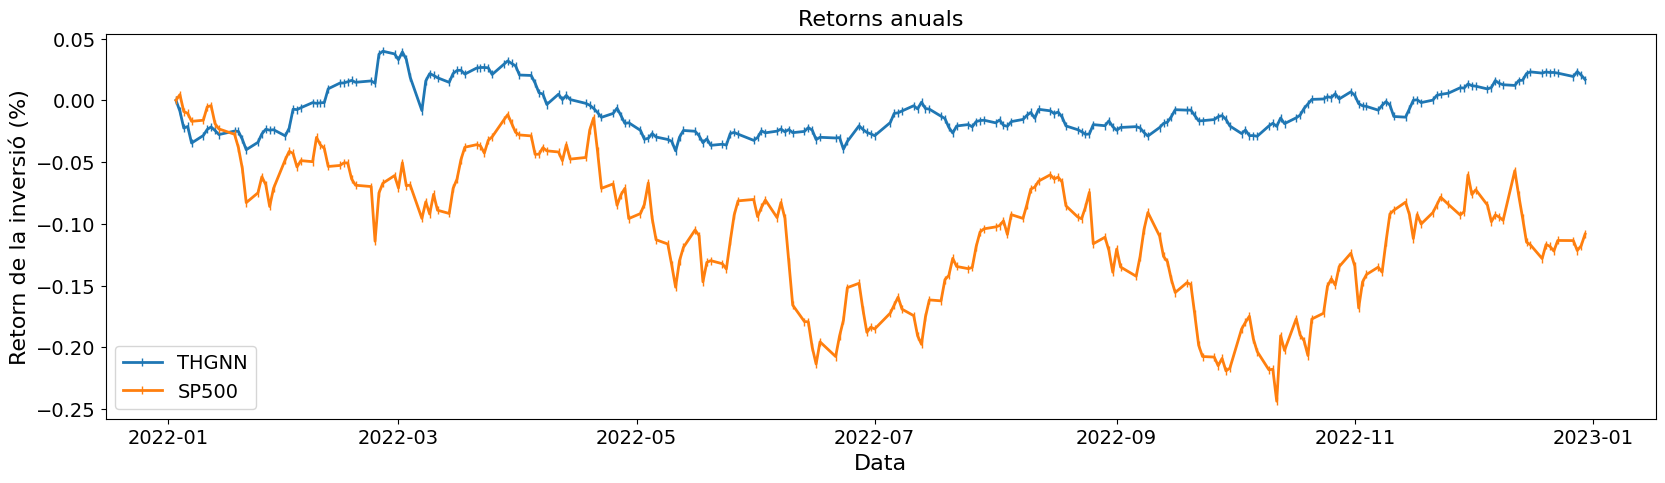

In [1]:
import alphalens
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
from backtest import *
from eval import *


#PATH = "/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoValid_2022-01-01_2022-12-31.csv"

def plot_net_value(profit_series_list, labels, fig_size=(20, 5), title='Retorns anuals', x_label='Data', y_label='Retorn de la inversió (%)', line_width=2):
    """
    画净值曲线函数

    参数：
    profit_series_list: list，包含多个 pd.Series 类型的列表，每个 Series 代表一个净值序列
    fig_size: tuple，画布大小，默认为 (10, 6)
    title: str，图表标题，默认为 'Net Value Curve'
    x_label: str，x轴标签，默认为 'Date'
    y_label: str，y轴标签，默认为 'Net Value'

    返回：
    None
    """
    plt.figure(figsize=fig_size)
    # 遍历每个净值序列，计算其投资组合价值的时间序列数据，然后画出净值曲线
    for i, profit_series in enumerate(profit_series_list):
        net_value_series = profit_series.cumsum()
        plt.plot(net_value_series, label=labels[i], linewidth=line_width, marker="|")

    # 添加图例
    # 设置图表属性
    plt.title(title,fontsize = 16)
    plt.xlabel(x_label, fontsize = 16)
    plt.ylabel(y_label, fontsize = 16)
    plt.legend(fontsize = 14)
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

def plot(models):
    b = BackTest(1000000, 0.00, 0.00)
    profit_series_list = []
    labels = []

    for model_name, path in models:
        model_data = pd.read_csv(path, index_col=0)
        ret_model = b.get_daily_pnl(model_data, 0.1)
        ret_model.index = pd.to_datetime(ret_model.index, format="%Y-%m-%d")

        profit_series_list.append(ret_model)
        labels.append(model_name)

    # Calculate and add SP500 data
    sp500 = model_data.groupby("date")["ret"].mean().shift(1).fillna(0)
    sp500.index = pd.to_datetime(sp500.index, format="%Y-%m-%d")

    profit_series_list.append(sp500)
    labels.append("SP500")


    plot_net_value(profit_series_list, labels)

    
    
# Example usage
models = [
    ("THGNN", "/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoValid_2022-01-01_2022-12-31.csv"),
    # Add other models as needed
]
plot(models)

    # ===================================signal plot===============================================
    # factor = thgnn[["date", "stock_id", "y_pred"]]
    # factor["date"] = pd.to_datetime(factor["date"], format="%Y%m%d")
    # factor.columns = ["date", "asset", "y_pred"]
    # factor = factor.set_index(["date", "asset"])["y_pred"]

    # ret = gru[["date", "stock_id", "ret"]]
    # ret["date"] = pd.to_datetime(ret["date"], format="%Y%m%d")
    # ret.columns = ["date", "asset", "ret"]
    # ret = ret.set_index(["date", "asset"])
    # ret.columns = ["1D"]

    # df = alphalens.utils.get_clean_factor(factor, ret, quantiles=5)
    # alphalens.tears.create_full_tear_sheet(df)



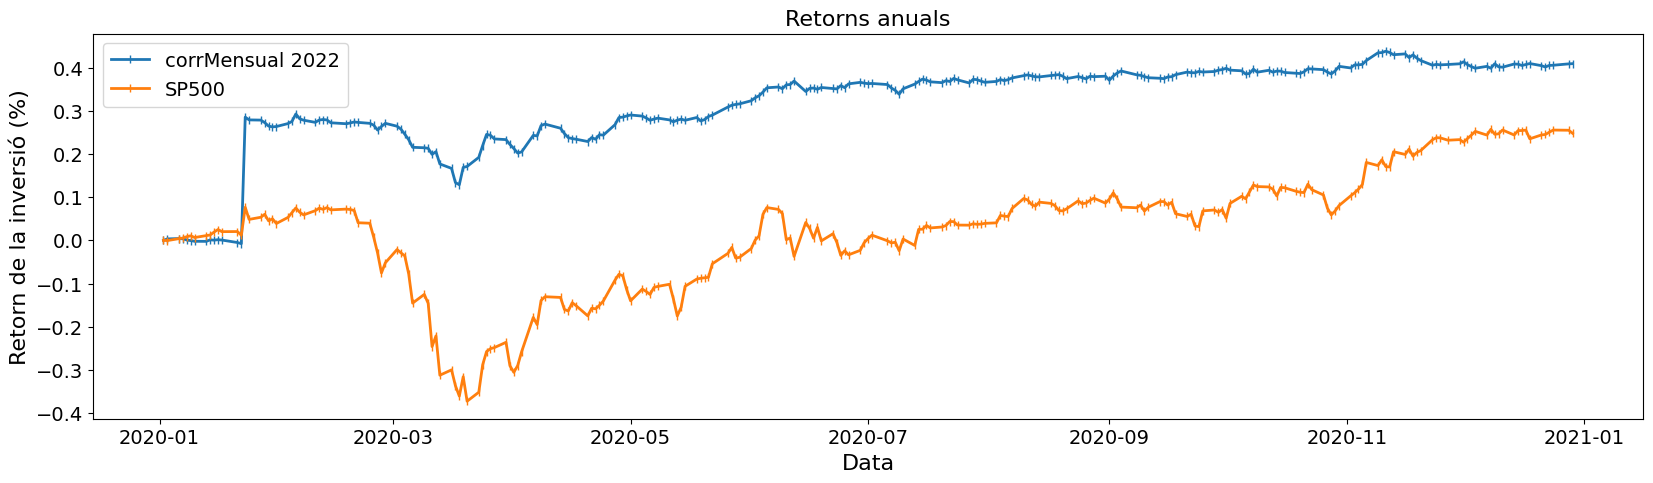

In [2]:
plot([("corrMensual 2022","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoValid_2020-01-01_2020-12-31.csv")])

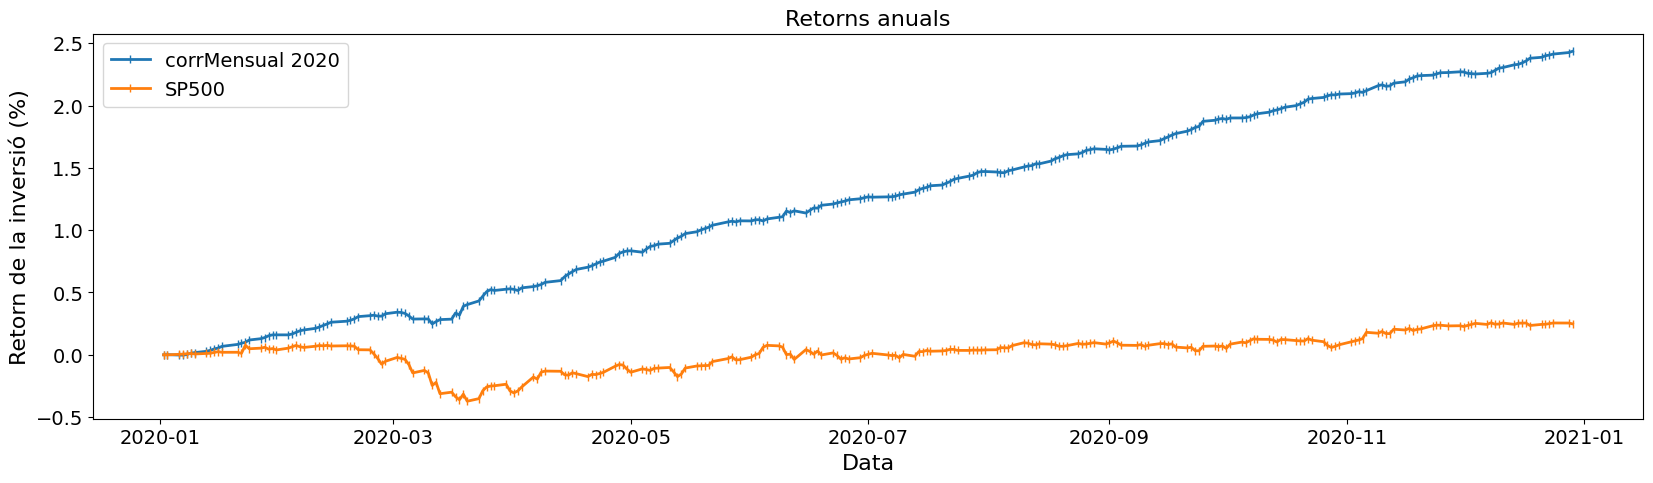

In [3]:
plot([("corrMensual 2020","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoFake_2020-01-01_2020-12-31.csv")])

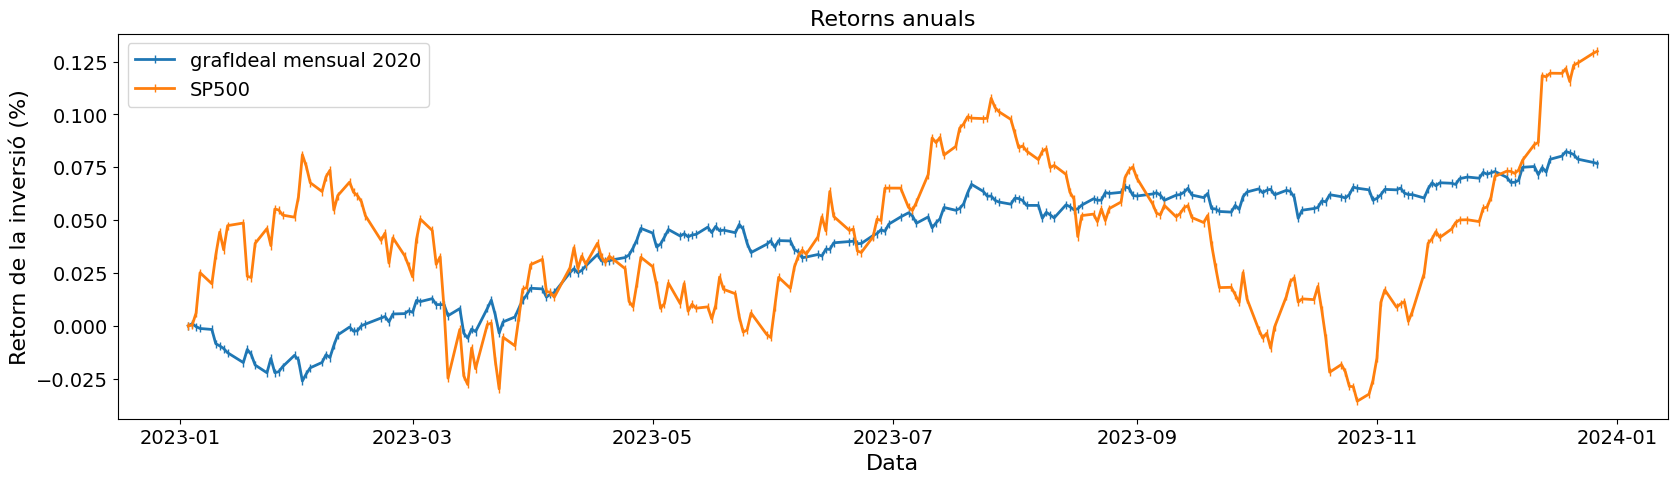

In [4]:
plot([("grafIdeal mensual 2020","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoValid_2023-01-01_2023-12-31.csv")])


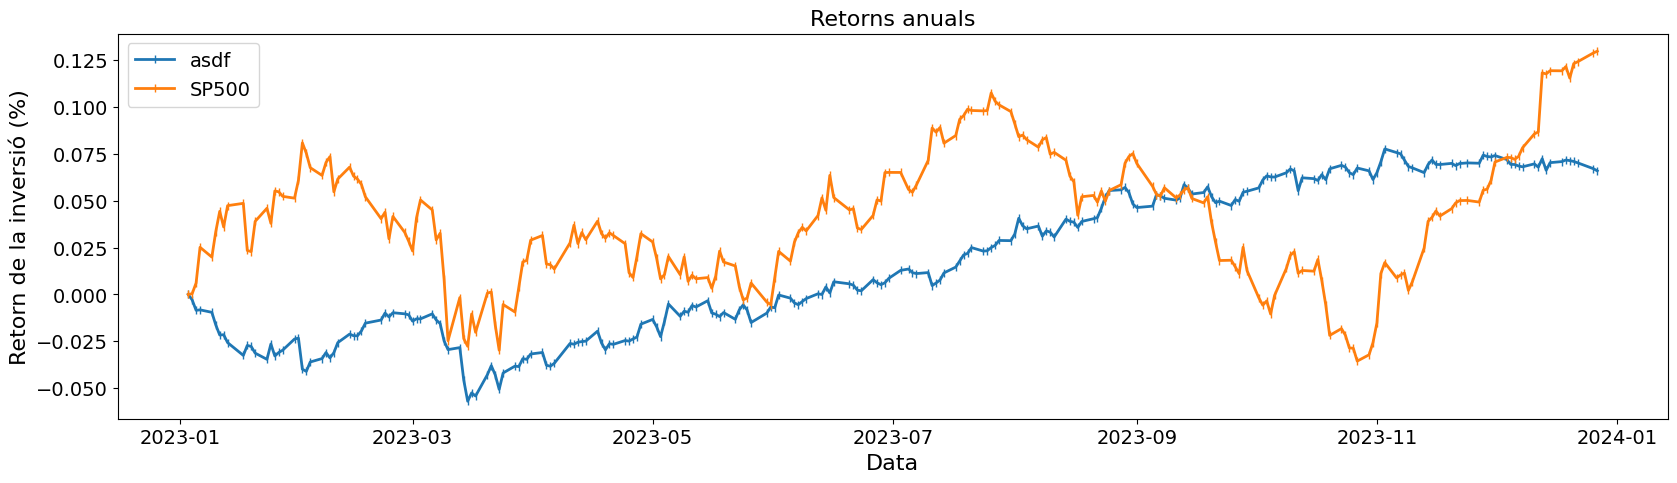

In [5]:
plot([("asdf","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoValidDay_2023-01-01_2023-12-31.csv")])


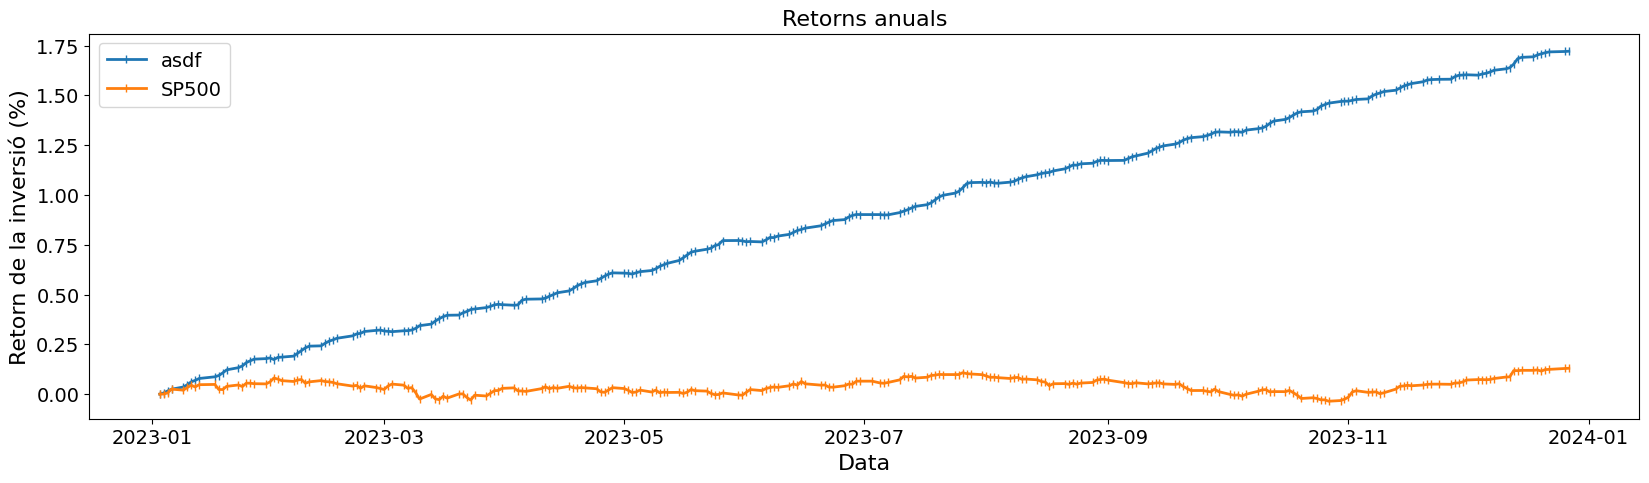

In [6]:
plot([("asdf","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infofake23_2023-01-01_2023-12-31.csv")])


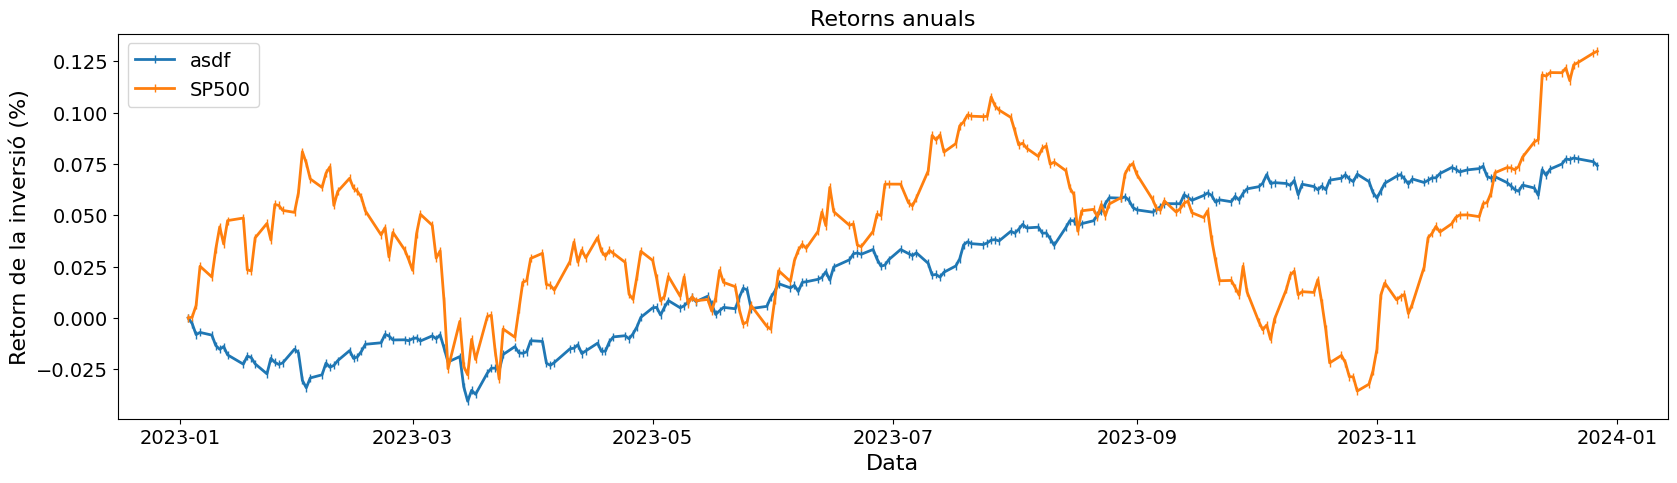

In [7]:
plot([("asdf","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/inforeduit_2023-01-01_2023-12-31.csv")])


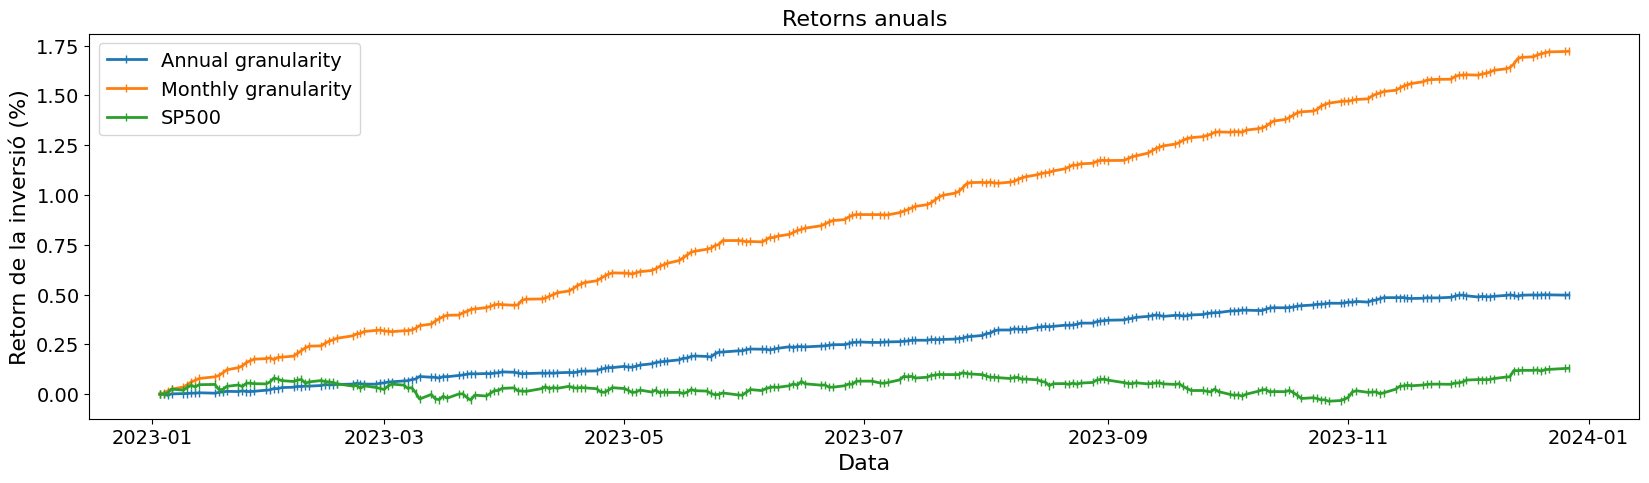

In [8]:
plot([("Annual granularity","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoGrafAnualFake_2023-01-01_2023-12-31_0.csv"),
    ("Monthly granularity","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infofake23_2023-01-01_2023-12-31.csv")])
    

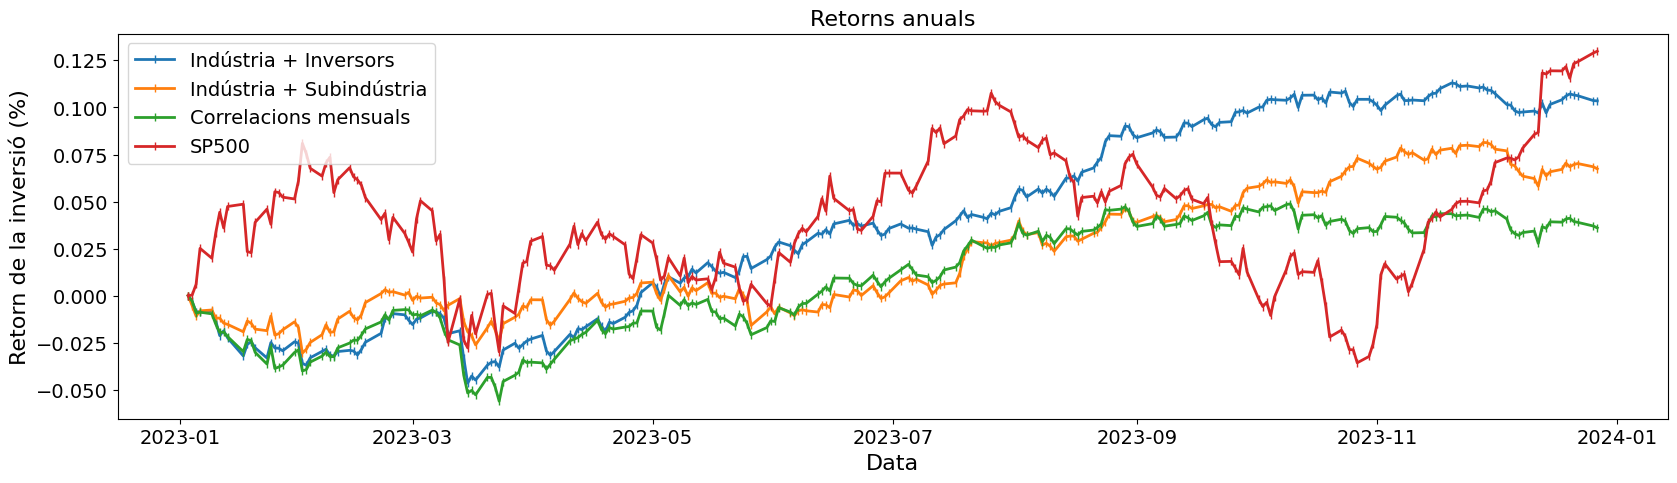

In [9]:
plot([("Indústria + Inversors","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriastockholders_2023-01-01_2023-12-31_4.csv"),
    ("Indústria + Subindústria","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriasubindustria_2023-01-01_2023-12-31_4.csv"),
    ("Correlacions mensuals","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infocorrelacioMensual_2023-01-01_2023-12-31_3.csv"),])
    

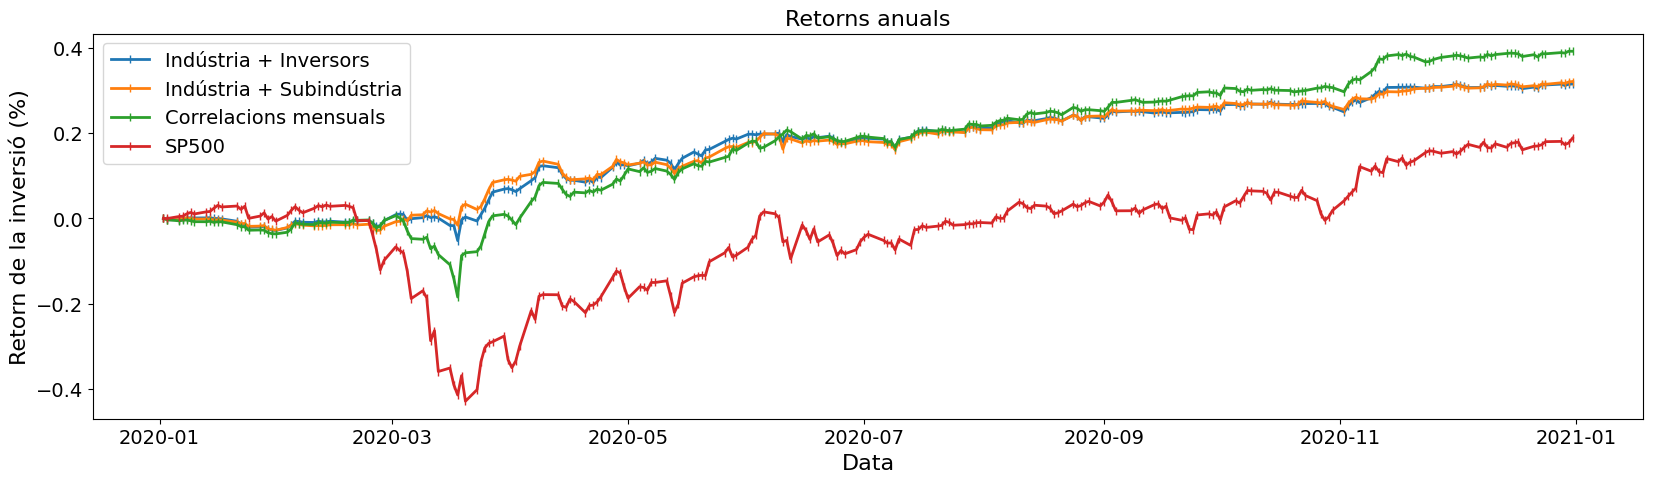

In [10]:
plot([("Indústria + Inversors","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriastockholders_2020-01-01_2020-12-31_3.csv"),
    ("Indústria + Subindústria","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriasubindustria_2020-01-01_2020-12-31_1.csv"),
    ("Correlacions mensuals","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infocorrelacioMensual_2020-01-01_2020-12-31_4.csv"),])

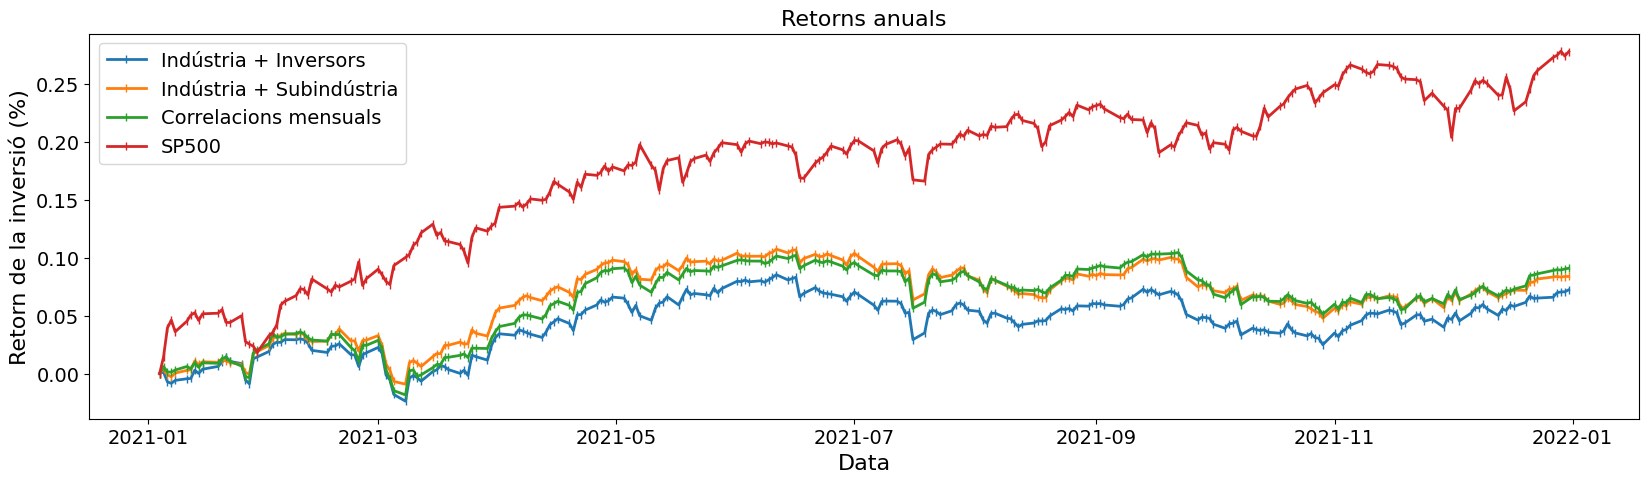

In [11]:
plot([("Indústria + Inversors","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriastockholders_2021-01-01_2021-12-31_4.csv"),
    ("Indústria + Subindústria","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriasubindustria_2021-01-01_2021-12-31_4.csv"),
    ("Correlacions mensuals","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infocorrelacioMensual_2021-01-01_2021-12-31_0.csv"),])

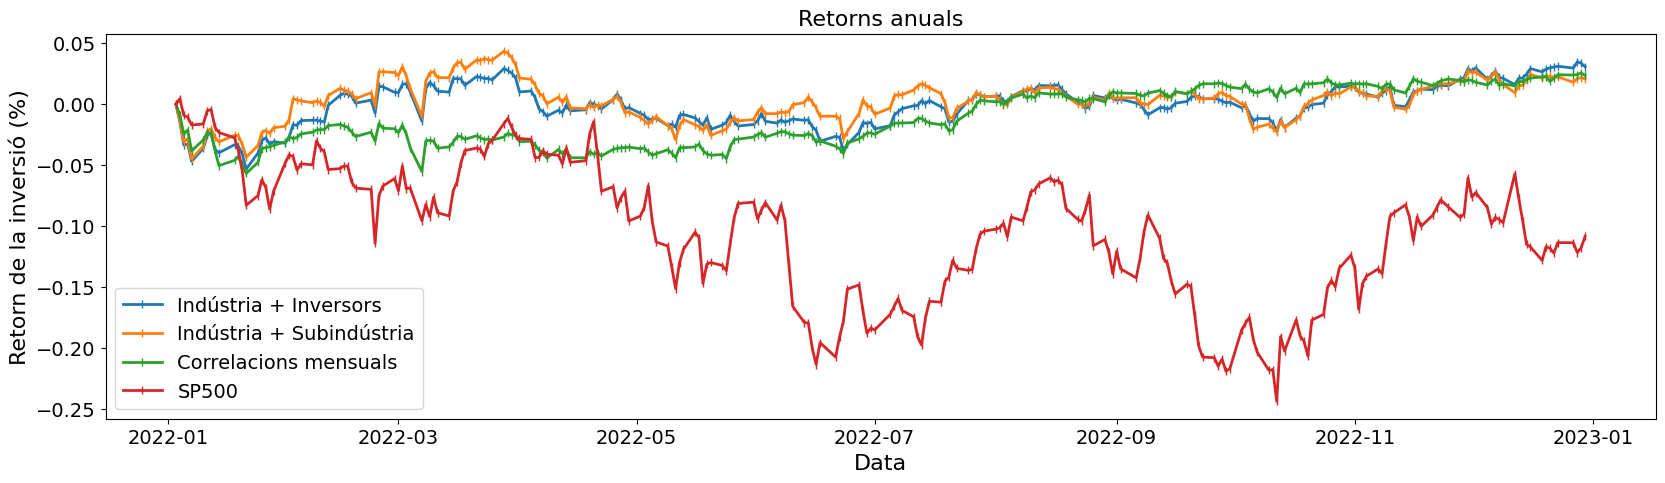

In [12]:
plot([("Indústria + Inversors","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriastockholders_2022-01-01_2022-12-31_1.csv"),
    ("Indústria + Subindústria","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infoindustriasubindustria_2022-01-01_2022-12-31_3.csv"),
    ("Correlacions mensuals","/home/mmunoz/GNN-Stock-Prediction/alpha/model/THGNN/THGNN_0.0.1/infocorrelacioMensual_2022-01-01_2022-12-31_0.csv"),])